In [5]:
# Import neccessary modules:

from math import log10, floor
from numba import jit
import time
import matplotlib.image as mpimg
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob, os
import obspy
from obspy import read
from obspy import Stream
from obspy.core import UTCDateTime
import datetime
import cv2
import re
import scipy
import scipy.signal as signal
%matplotlib notebook




[  0.   124.21 287.12 290.82 395.98 444.61 507.13 617.43 694.39 820.58]
[0.    0.084 0.033 0.072 0.183 0.126 0.229 0.162 0.361 1.159]
[0.    0.949 0.897 0.936 0.969 0.934 1.039 1.034 1.162 2.063]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


C:\Users\sofia\AppData\Local\Temp\ipykernel_17884\2654016341.py:88: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, _, _, _ = np.linalg.lstsq(distance_array, array_arrivals)
C:\Users\sofia\AppData\Local\Temp\ipykernel_17884\2654016341.py:89: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  aa, _, _, _ = np.linalg.lstsq(distance_array, array_arrivals_2)


<IPython.core.display.Javascript object>


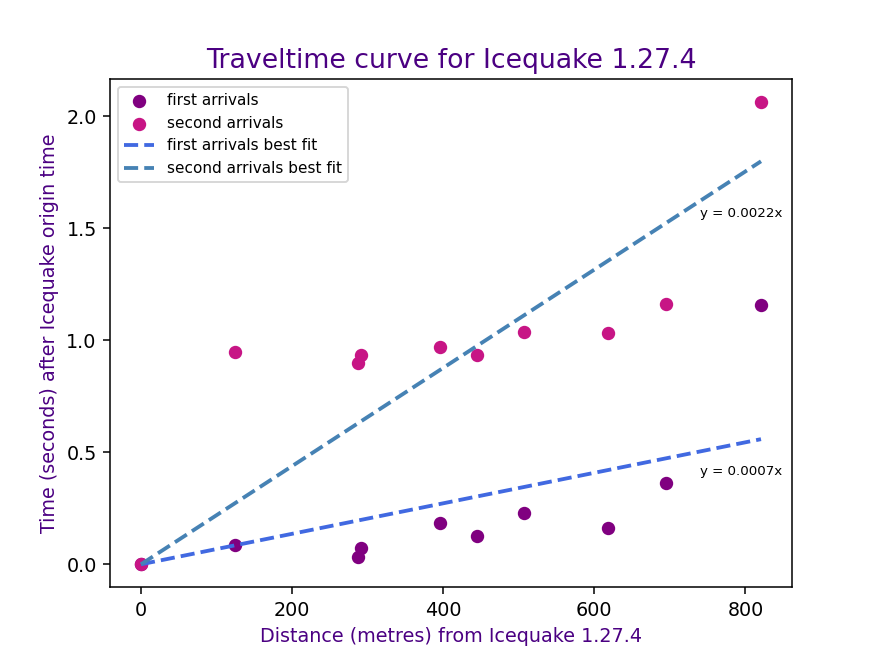

[0.00068096]


In [6]:
arrival_times=[]
arrival_times_2=[]

arrival_times.append(0.221)
    
#Time of arrival at st_tmp[6]-> Node 23.
arrival_times.append(0.305)

#Time of arrival at st_tmp[4]-> Node 20.
arrival_times.append(0.254)

#Time of arrival at st_tmp[5]-> Node 21.
arrival_times.append(0.293)

#Time of arrival at st_tmp[2]-> Node 18.
arrival_times.append(0.404)

#Time of arrival at st_tmp[3]-> Node 19.
arrival_times.append(0.347)

#Time of arrival at st_tmp[8]-> Node 29.
arrival_times.append(0.450)

#Time of arrival at st_tmp[7]-> Node 24.
arrival_times.append(0.383)

#Time of arrival at st_tmp[0]-> Node 14.
arrival_times.append(0.582)

#Time of arrival at st_tmp[1]-> Node 17.
arrival_times.append(1.380)


    
print()
print()
print()

arrival_times_2.append(0.221)

#Time of arrival at st_tmp[6]-> Node 23.
arrival_times_2.append(1.170)

#Time of arrival at st_tmp[4]-> Node 20.
arrival_times_2.append(1.118)

#Time of arrival at st_tmp[5]-> Node 21.
arrival_times_2.append(1.157)

#Time of arrival at st_tmp[2]-> Node 18.
arrival_times_2.append(1.190)

#Time of arrival at st_tmp[3]-> Node 19.
arrival_times_2.append(1.155)

#Time of arrival at st_tmp[8]-> Node 29.
arrival_times_2.append(1.260)

#Time of arrival at st_tmp[7]-> Node 24.
arrival_times_2.append(1.255)

#Time of arrival at st_tmp[0]-> Node 14.
arrival_times_2.append(1.383)

#Time of arrival at st_tmp[1]-> Node 17.
arrival_times_2.append(2.284)


for i in range (10):
    arrival_times[i]=arrival_times[i]-0.221
    arrival_times_2[i]=arrival_times_2[i]-0.221

array_arrivals=np.array(arrival_times)
array_arrivals_2=np.array(arrival_times_2)

distance = [0, 124.21, 287.12, 290.82, 395.98, 444.61, 507.13, 617.43, 694.39, 820.58]
distance_array=np.array(distance)


print(distance_array)
print(array_arrivals)
print(array_arrivals_2)
print(type(distance_array))
print(type(array_arrivals))
print(type(array_arrivals_2))

distance_array = distance_array[:,np.newaxis]
a, _, _, _ = np.linalg.lstsq(distance_array, array_arrivals)
aa, _, _, _ = np.linalg.lstsq(distance_array, array_arrivals_2)

plt.figure()
plt.scatter(distance_array, array_arrivals, color='purple', label='first arrivals')
plt.scatter(distance_array, array_arrivals_2, color='mediumvioletred', label='second arrivals')
plt.plot(distance_array, a*distance_array, color='royalblue', linestyle='--', linewidth=2, label='first arrivals best fit')
plt.plot(distance_array, aa*distance_array, color='steelblue', linestyle='--', linewidth=2, label='second arrivals best fit')
plt.legend(loc='upper left', prop={'size':8})
plt.xlabel("Distance (metres) from Icequake 1.27.4", color='indigo')
plt.ylabel('Time (seconds) after Icequake origin time', color='indigo')
plt.title("Traveltime curve for Icequake 1.27.4", fontsize = 14, color='indigo')
rounded_a=round(float(a), 4)
rounded_aa=round(float(aa), 4)
plt.text(740, 0.4,f"y = {rounded_a}x", size=7)
plt.text(740, 1.55,f"y = {rounded_aa}x", size=7)


plt.show()
print(a)




[0.    0.023 0.131 0.145 0.174 0.103 0.298 0.344 0.377 0.392]
[0.    0.925 0.969 0.968 0.966 0.924 1.007 1.077 1.111 1.112]
[  0.    89.39 266.31 331.29 550.48 601.03 661.18 763.3  955.95 956.48]
[0.    1.852 1.907 1.841 1.934 1.95 ]
[  0.    89.39 266.31 331.29 550.48 601.03]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


C:\Users\sofia\AppData\Local\Temp\ipykernel_17884\1523156866.py:98: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a_IC2, _, _, _ = np.linalg.lstsq(distance_array_IC2, array_arrivals_IC2)
C:\Users\sofia\AppData\Local\Temp\ipykernel_17884\1523156866.py:99: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  aa_IC2, _, _, _ = np.linalg.lstsq(distance_array_IC2, array_arrivals_IC2_2)
C:\Users\sofia\AppData\Local\Temp\ipykernel_17884\1523156866.py:103: FutureWarning: `rcond` parameter will change to the default of machine precisi

<IPython.core.display.Javascript object>


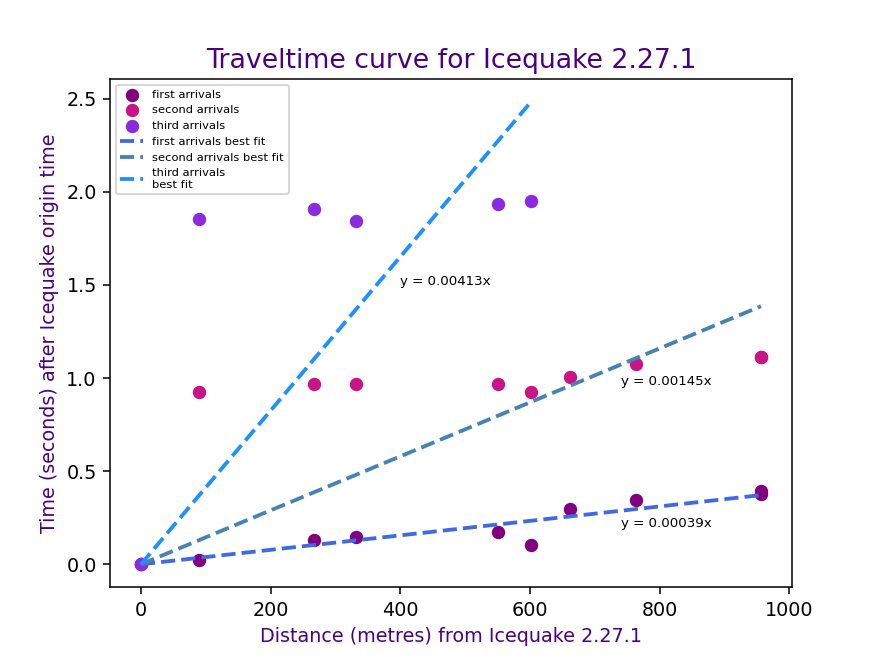

[0.0003884]


In [7]:
arrival_times_IC2=[]
arrival_times_IC2_2=[]
    
arrival_times_IC2.append(7.965)

#Time of arrival at st_tmp[7]-> Node 24.
arrival_times_IC2.append(7.988)

#Time of arrival at st_tmp[5]-> Node 21.
arrival_times_IC2.append(8.096)

#Time of arrival at st_tmp[8]-> Node 29.
arrival_times_IC2.append(8.110)

#Time of arrival at st_tmp[4]-> Node 20.
arrival_times_IC2.append(8.139)

#Time of arrival at st_tmp[1]-> Node 17.
arrival_times_IC2.append(8.068)

#Time of arrival at st_tmp[6]-> Node 23.
arrival_times_IC2.append(8.263)

#Time of arrival at st_tmp[2]-> Node 18.
arrival_times_IC2.append(8.309)

#Time of arrival at st_tmp[3]-> Node 19.
arrival_times_IC2.append(8.342)

#Time of arrival at st_tmp[0]-> Node 14.
arrival_times_IC2.append(8.357)

    
print()
print()
print()
    
arrival_times_IC2_2.append(7.965)    

#Time of arrival at st_tmp[7]-> Node 24.
arrival_times_IC2_2.append(8.890)

#Time of arrival at st_tmp[5]-> Node 21.
arrival_times_IC2_2.append(8.934)

#Time of arrival at st_tmp[8]-> Node 29.
arrival_times_IC2_2.append(8.933)

#Time of arrival at st_tmp[4]-> Node 20.
arrival_times_IC2_2.append(8.931)

#Time of arrival at st_tmp[1]-> Node 17.
arrival_times_IC2_2.append(8.889)

#Time of arrival at st_tmp[6]-> Node 23.
arrival_times_IC2_2.append(8.972)

#Time of arrival at st_tmp[2]-> Node 18.
arrival_times_IC2_2.append(9.042)

#Time of arrival at st_tmp[3]-> Node 19.
arrival_times_IC2_2.append(9.076)

#Time of arrival at st_tmp[0]-> Node 14.
arrival_times_IC2_2.append(9.077)
    
for i in range (10):
    arrival_times_IC2[i]=arrival_times_IC2[i]-7.965
    arrival_times_IC2_2[i]=arrival_times_IC2_2[i]-7.965

array_arrivals_IC2=np.array(arrival_times_IC2)
array_arrivals_IC2_2=np.array(arrival_times_IC2_2)

distance_IC2 = [0, 89.39, 266.31, 331.29, 550.48, 601.03, 661.18, 763.30, 955.95, 956.48]
distance_array_IC2=np.array(distance_IC2)



array_arrivals_IC2_3=np.array([0, 1.852, 1.907, 1.841, 1.934, 1.95])

distance_IC2_v2 = [0, 89.39, 266.31, 331.29, 550.48, 601.03]
distance_array_IC2_v2=np.array(distance_IC2_v2)


print(array_arrivals_IC2)
print(array_arrivals_IC2_2)
print(distance_array_IC2)
print(array_arrivals_IC2_3)
print(distance_array_IC2_v2)
print(type(array_arrivals_IC2))
print(type(array_arrivals_IC2_2))
print(type(distance_array_IC2))
print(type(array_arrivals_IC2_3))
print(type(distance_array_IC2_v2))


distance_array_IC2 = distance_array_IC2[:,np.newaxis]
a_IC2, _, _, _ = np.linalg.lstsq(distance_array_IC2, array_arrivals_IC2)
aa_IC2, _, _, _ = np.linalg.lstsq(distance_array_IC2, array_arrivals_IC2_2)


distance_array_IC2_v2 = distance_array_IC2_v2[:,np.newaxis]
aaa_IC2, _, _, _ = np.linalg.lstsq(distance_array_IC2_v2, array_arrivals_IC2_3)




plt.figure()
plt.scatter(distance_array_IC2, array_arrivals_IC2, color='purple', label='first arrivals')
plt.scatter(distance_array_IC2, array_arrivals_IC2_2, color='mediumvioletred', label='second arrivals')
plt.scatter(distance_array_IC2_v2, array_arrivals_IC2_3, color='blueviolet', label='third arrivals')
plt.plot(distance_array_IC2, a_IC2*distance_array_IC2, color='royalblue', linestyle='--', linewidth=2, label='first arrivals best fit')
plt.plot(distance_array_IC2, aa_IC2*distance_array_IC2, color='steelblue', linestyle='--', linewidth=2, label='second arrivals best fit')
plt.plot(distance_array_IC2_v2, aaa_IC2*distance_array_IC2_v2, color='dodgerblue', linestyle='--', linewidth=2, label='third arrivals\nbest fit')
plt.legend(loc='upper left', prop={'size':6})
plt.xlabel("Distance (metres) from Icequake 2.27.1", color='indigo')
plt.ylabel('Time (seconds) after Icequake origin time', color='indigo')
plt.title("Traveltime curve for Icequake 2.27.1", fontsize = 14, color='indigo')
rounded_a_IC2=round(float(a_IC2), 5)
rounded_aa_IC2=round(float(aa_IC2), 5)
rounded_aaa_IC2=round(float(aaa_IC2), 5)
plt.text(740, 0.2,f"y = {rounded_a_IC2}x", size=7)
plt.text(740, 0.96,f"y = {rounded_aa_IC2}x", size=7)
plt.text(400, 1.5,f"y = {rounded_aaa_IC2}x", size=7)


plt.show()
print(a_IC2)

In [8]:
print(1/a)
print(1/a_IC2)

[1468.51452009]
[2574.69813751]
